<a href="https://colab.research.google.com/github/SUNITHA123-THUMMA/Brain-Tumor-Classification/blob/main/trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
#drive.mount('/content/gdrive/')

MessageError: ignored

In [ ]:
import os
root_path = 'gdrive/My Drive/' #MINI FINAL'
print(os.getcwd())
os.chdir(root_path)
!ls

In [ ]:
print(os.getcwd())

/content/gdrive/My Drive


# Import Library

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, save_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers as rg
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import backend as K
import numpy.random as rng
import random

from matplotlib import pyplot as plt
import numpy as np
#from datagenerator  import DataGenerator # train query set generator
import tensorflow as tf
from keras.utils import np_utils
import tensorflow

There are Basically three parts in this workspace.


1.   Data preparation
2.   Sample/episodes generation
3.   Model training


1. Data preparation

--.   Unzip image files
--.   Read each folder (language) then each folder (alphabets) then each character , resize, reshape it and put on array form.



# Data/sample generation

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
#from scipy.misc import imresize
import cv2

In [ ]:
path1 = "DataSet"
folders_list = os.listdir(path1)
print("folder1:",folders_list)
folders_list.sort()




folder1: ['LGG', 'HGG', 'Model']


In [ ]:
i=1
for folder in tqdm(folders_list):
        path1 = os.path.join(path, folder)
        print(folder,'-',i,':',len(os.listdir(path1)))

100%|██████████| 3/3 [00:00<00:00, 227.03it/s]

HGG - 1 : 259
LGG - 1 : 76
Model - 1 : 0


# Load Data

In [ ]:
def loader(path):
    sample_train = [];sample_val = [];sample_test = []
    label1 = [] ;label2 = [] ;label3 = []

    folders_list = os.listdir(path)
    print("folder1:",len(folders_list))
    folders_list.sort()
    count = 0;i=0; center=(50,50); scale=1.0;

    for folder in tqdm(folders_list):
         path1 = os.path.join(path, folder)
         #print(folder,'-',i,':',len(os.listdir(path1)))
         try:
            for image_name in os.listdir(path1):
              sample_images=[]  ; t=0;
              for image_name1 in sorted(os.listdir(path1+"/"+image_name)):
                  path2=os.path.join(path1+"/"+image_name+"/", image_name1)
                  #print(str(t)+":"+ path2+"\n", end = '')
                  image = cv2.imread(path2,0)/255 ; t=t+1
                  sample_images += [image]
                  if(folder=='HGG'):
                    l=0
                  else:
                    l=1
              print(t)
              if(i<180 or( i>259 and i<300)):
                label1.append(l)
                sample_train.append(sample_images)
              if((i>180  and i<220) or( i>300 and i<320)):
                label2.append(l)
                sample_val.append(sample_images)
              if((i>220  and i<259) or i>320):
                label3.append(l)
                sample_test.append(sample_images)
              i+=1
              #print("\n")
         except NotADirectoryError:
              print(f"Cannot load from {path1}")


    print("count:",count)
    return sample_train,sample_val,sample_test, label1,label2,label3



In [ ]:
path="DataSet"
sample_train,sample_val,sample_test, label1,label2,label3 = loader(path)

print(np.array(sample_train).shape)
print(np.array(label1).shape)
print(np.array(sample_val).shape)
print(np.array(label2).shape)
print(np.array(sample_test).shape)
print(np.array(label3).shape)




folder1: 3


  0%|          | 0/3 [00:00<?, ?it/s]

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


 33%|███▎      | 1/3 [14:37<29:15, 877.64s/it]

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


100%|██████████| 3/3 [19:01<00:00, 380.35s/it]

15
count: 0


(220, 15, 231, 231)
(220,)
(58, 15, 231, 231)
(58,)
(52, 15, 231, 231)
(52,)


In [ ]:
x=[] #np.zeros((345,15,231,231,3))

for i in range (335):
  x.append(list(sample_train[1]))

print(np.array(x).shape)

(335, 15, 231, 231)


In [ ]:
np.array(sample_test[1]).shape

(15, 231, 231)

# Episode Generation

In [ ]:
import random
from numpy import array, where
from random import choice

train_way = 2
val_way = 2
query =1
shot = 5

class Data_GeneratorFace(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, datatype='train', dim=(231,231), n_channels=1, way=2,vway=2, shot=1, query=1, num_batch=10):
        'Initialization'
        self.data=sample_train
        self.y=label1
        if(datatype=='val'):
           self.data=sample_val
           self.y=label2
        if(datatype=='test'):
           self.data=sample_test
           self.y=label3
        self.dim = dim
        self.n_channels = n_channels

        self.num_batch = num_batch
        self.num_per_class = 15 #len(self.data)
        self.on_epoch_end()
        self.way = way
        self.vway = vway
        self.shot = shot
        self.query = query

    def __len__(self):
        'Denotes the number of batches per epoch'
        return self.num_batch
    def __getitem__(self,index):
        'Generate one batch of data'
        print(self.dim)
        X_sample, X_query, label = self.__data_generation()
        return [X_sample, X_query], label

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

    def __data_generation(self):
        n_classes=np.unique(self.y)
        X_sample = []; #np.empty((way, shot, *dim))
        X_query = [] #np.empty((way, query, *dim))
        label = np.zeros((self.vway*self.query,self.way))
        LL=np.reshape(self.y,(-1,1))
        ind1= choice(array(where(LL == 0)).T)[0]
        ind2= choice(array(where(LL == 1)).T)[0]
        print(ind1, ind2)
        X_temp = [];
        sample_idx = random.sample(list(np.arange(1,self.num_per_class-1)), self.shot)
        print(sample_idx)
        for s in range(self.shot):
              img= self.data[ind1][sample_idx[s]]
              X_temp+= [img]
        X_sample.append(X_temp)

        X_temp = [];
        for s in range(self.shot):
              img= self.data[ind2][sample_idx[s]]
              X_temp+= [img]
        X_sample.append(X_temp)

        sample_idx2 = random.sample(list(np.arange(self.num_per_class)), 1)
        img=self.data[ind1][sample_idx2]
        X_query.append(img)
        img=self.data[ind2][sample_idx2]
        X_query.append(img)

        label[0,0]=1; label[1,1]=1

        return np.array(X_sample), np.array(X_query), np.array(label)


train_loader = Data_GeneratorFace(way=train_way,vway=val_way,datatype='train',query=query, shot=shot, num_batch=1)
#val_loader = Data_GeneratorFace(way=train_way,vway=val_way, datatype='val',query=query, shot=shot, num_batch=10)


In [ ]:
(x,y),z=train_loader[0]
print()
print(x.shape,y.shape,z.shape)
print()
print(z)


(2, 5, 231, 231, 1) (2, 1, 231, 231, 1) (2, 2)

[[1. 0.]
 [0. 1.]]


In [ ]:
sample_idx=random.sample(list(np.arange(15)),5)
LL=np.reshape(label1,(-1,1))

ind1= choice(array(where(LL == 0)).T)[0]

print(sample_train[ind1][sample_idx[4]].shape)

(231, 231)


In [ ]:
import random
from numpy import array, where
from random import choice

train_way = 2
val_way = 2
query =1
shot = 5

class Data_GeneratorRavi(tf.keras.utils.Sequence):
    'Generates data for Keras'
    #def __init__(self, datatype='train', dim=(32,32), n_channels=1, way=20, shot=1, query=1, num_batch=10):
    def __init__(self, datatype='train', dim=(231,231),num_per_class=1, n_channels=1, way=20,vway=20, shot=1, query=1, num_batch=10):
        'Initialization'
        #if(datatype=='train'):
        self.data=sample_train
        self.y=label1
        if(datatype=='val'):
           self.data=sample_val
           self.y=label2
        if(datatype=='test'):
           self.data=sample_test
           self.y=label3
        self.dim = dim
        self.num_batch = num_batch
        self.num_per_class = 15 # len(self.data)
        self.on_epoch_end()
        self.way = way
        self.vway = vway
        self.shot = shot
        self.query = 1

    def __len__(self):
        'Denotes the number of batches per epoch'
        return self.num_batch
    def __getitem__(self,index):
        'Generate one batch of data'

        X_sample, X_query, label = self.__data_generation()
        return [X_sample, X_query], label

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

    def __data_generation(self):
        n_classes=np.unique(self.y)
        X_sample = []; #np.empty((way, shot, *dim))
        X_query = [] #np.empty((way, query, *dim))
        label = np.zeros((2,2))
        LL=np.reshape(self.y,(-1,1))
        ind1= choice(array(where(LL == 0)).T)[0]
        ind2= choice(array(where(LL == 1)).T)[0]

        X_temp = [];
        sample_idx = random.sample(list(np.arange(self.num_per_class)), self.shot)

        for s in range(self.shot):
              img= np.reshape(self.data[ind1][sample_idx[s]],(231,231,1))
              X_temp+= [img]
        X_sample.append(X_temp)

        X_temp = [];
        for s in range(self.shot):
              img= np.reshape(self.data[ind2][sample_idx[s]],(231,231,1))
              X_temp+= [img]
        X_sample.append(X_temp)
        #.......................................................................................
        sample_idx2 = random.sample(list(np.arange(self.num_per_class)), self.query)  #[0]
        X_tempp = [];
        for s in range(self.query):
            img=np.reshape(self.data[ind1][sample_idx2[s]] ,(231,231,1))
            X_tempp+= [img]
        X_query.append(X_tempp)

        X_tempp = [];
        for s in range(self.query):
            img=np.reshape(self.data[ind2][sample_idx2[s]] ,(231,231,1))
            X_tempp+= [img]
        X_query.append(X_tempp)

        label[0,0]=1; label[1,1]=1

        return np.array(X_sample), np.array(X_query), np.array(label)

train_loader = Data_GeneratorRavi(way=train_way,vway=val_way,datatype='train',query=query, shot=shot, num_batch=10)

(x,y),z=train_loader[0]
print(x.shape,y.shape,z.shape)
print()
print(z)

(2, 5, 231, 231, 1) (2, 1, 231, 231, 1) (2, 2)

[[1. 0.]
 [0. 1.]]


# 3. Model Initialization

---



In [ ]:

lr = 0.001
eps = 1e-12

def W_init(shape,name=None):
    """Initialize weights as in paper"""
    values = rng.normal(loc=0,scale=1e-2,size=shape)
    return K.variable(values,name=name)

def b_init(shape,name=None):
    """Initialize bias as in paper"""
    values=rng.normal(loc=0.5,scale=1e-2,size=shape)
    return K.variable(values,name=name)

#build convnet to use in each siamese 'leg'
def conv_net(dim):
    convnet = Sequential()
    for i in range(4):
        convnet.add(Conv2D(64,(3,3),padding='same',input_shape=dim))
        convnet.add(BatchNormalization())
        convnet.add(Activation('relu'))
        convnet.add(MaxPooling2D())
    convnet.add(Flatten())
    return convnet


def proto_dist(x):  # Negative softmax distance measure
    feature, pred = x
    pred_dist = tf.reduce_sum(pred ** 2, axis=1, keepdims=True)
    feature_dist = tf.reduce_sum(feature ** 2, axis=1, keepdims=True)
    #print(pred_dist.shape);  print(feature_dist.shape)
    dot = tf.matmul(pred, tf.transpose(feature))
    #print(dot.shape)
    return tf.nn.softmax(-(tf.sqrt(pred_dist + tf.transpose(feature_dist) - 2 * dot)))


def reduce_tensor(x):
    y=tf.reduce_mean(x, axis=1)
    return y


def reshape_query(x):  # reshape query output to  dimention 64*query,1
    y=tf.reshape(x, [-1, tf.shape(x)[-1]])
    return y

def normalise(xx):
  global noise
  std = tf.reshape(tf.math.reduce_std(xx,axis=1),(-1,1))
  meanFeature = tf.reshape(tf.reduce_mean(xx,axis=1),(-1,1))
  out_feature = (xx- meanFeature)/std
  return out_feature


# def normalise(xx):

#     std = tf.reshape(tf.math.reduce_std(xx,axis=1),(1,-1))
#     meanFeature = tf.reshape(tf.reduce_mean(xx,axis=1),(1,-1))
#     out_feature = tf.transpose((tf.transpose(xx)- meanFeature)/std)
#     return out_feature


In [ ]:
(x,y),z=train_loader[0]
z.shape

(2, 2)

#ProtoNet Model Traning

###  ProtoNet 5-5

In [ ]:
train_way = 2
val_way = 2
query = 5
shot = 5
n=80
lr=0.001
dim=(231,231,1)

from tensorflow.keras import callbacks as cb

def scheduler(epoch):
    global lr
    if epoch%5 == 0:
        lr/= 1.2
    return lr

if __name__ == "__main__":
    conv = conv_net(dim)
    conv_5d = TimeDistributed(conv)
    input_shape = (None,231,231,1)
    sample = Input(input_shape)
    out_feature = conv_5d(sample)
    out_feature = Lambda(reduce_tensor)(out_feature)

    inp = Input(input_shape)
    map_feature = conv_5d(inp)
    map_feature = Lambda(reduce_tensor)(map_feature)

    pred = Lambda(proto_dist)([normalise(out_feature), normalise(map_feature)]) #negative distance

    combine1 = Model([sample, inp], pred)
    optimizer = Adam(0.001)
    combine1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    print(combine1.summary())

 #.........................................................................................
    train_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='train',num_per_class=n,query=query, shot=shot, num_batch=100)
    val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='val',num_per_class=n, shot=shot, num_batch=100)

    reduce_lr = cb.ReduceLROnPlateau(monitor='val_loss', factor=0.4,patience=2, min_lr=1e-8)
    lr_sched = cb.LearningRateScheduler(scheduler)
    tensorboard = cb.TensorBoard()

    history3=combine1.fit_generator(train_loader,epochs=200,validation_data=val_loader, use_multiprocessing=True, workers=4, shuffle=True, callbacks=[ lr_sched, tensorboard])

combine1.save("Model/brats2019.h5")
np.save('Model/brats2019.npy',history3.history)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, 231,   0           []                               
                                231, 1)]                                                          
                                                                                                  
 input_6 (InputLayer)           [(None, None, 231,   0           []                               
                                231, 1)]                                                          
                                                                                                  
 time_distributed_2 (TimeDistri  (None, None, 12544)  112448     ['input_5[0][0]',                
 buted)                                                           'input_6[0][0]']          

<ipython-input-29-0c463fc29485>:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=combine1.fit_generator(train_loader,epochs=200,validation_data=val_loader, use_multiprocessing=True, workers=4, shuffle=True, callbacks=[ lr_sched, tensorboard])


100/100 [==============================] - 19s 151ms/step - loss: 0.7023 - categorical_accuracy: 0.7950 - val_loss: 1.8942 - val_categorical_accuracy: 0.7650 - lr: 8.3333e-04
Epoch 2/200
100/100 [==============================] - 14s 141ms/step - loss: 0.4687 - categorical_accuracy: 0.8250 - val_loss: 0.9262 - val_categorical_accuracy: 0.7350 - lr: 8.3333e-04
Epoch 3/200
100/100 [==============================] - 15s 143ms/step - loss: 0.4276 - categorical_accuracy: 0.8200 - val_loss: 0.7393 - val_categorical_accuracy: 0.7400 - lr: 8.3333e-04
Epoch 4/200
100/100 [==============================] - 15s 146ms/step - loss: 0.4678 - categorical_accuracy: 0.7850 - val_loss: 0.5906 - val_categorical_accuracy: 0.8100 - lr: 8.3333e-04
Epoch 5/200
100/100 [==============================] - 15s 150ms/step - loss: 0.4023 - categorical_accuracy: 0.8050 - val_loss: 1.0587 - val_categorical_accuracy: 0.7500 - lr: 8.3333e-04
Epoch 6/200
100/100 [==============================] - 15s 143ms/step - loss:

In [ ]:
combine1.save("Model/brats2019.h5")
np.save('Model/brats2019.npy',history3.history)

In [ ]:
combine1.save("Model/BrainImage.h5")
np.save('Model/BrainImage.npy',history3.history)

In [ ]:

train_way =2
val_way = 2
query = 1
shot = 5
result=[]

#m3=load_model('Model/BrainImage.h5')
m3=combine1
train_loader=Data_GeneratorRavi(way=train_way,vway=val_way, datatype='train',num_per_class=n,query=query, shot=shot, num_batch=1000)
test_loader=Data_GeneratorRavi(way=train_way,vway=val_way, datatype='test',num_per_class=n,query=query, shot=shot, num_batch=1000)
val_loader = Data_GeneratorRavi(way=train_way,vway=val_way, datatype='val',num_per_class=n,query=query, shot=shot, num_batch=1000)

(x1,y1),z1 = train_loader[0]
print("Training accuracy")
result=m3.evaluate(train_loader)

(x1,y1),z1 = test_loader[0]
print("Testing accuracy")
result=m3.evaluate(test_loader)

(x1,y1),z1 = val_loader[0]
print("Validating accuracy")
result=m3.evaluate(val_loader)



Training accuracy
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4664 - categorical_accuracy: 0.8400
Testing accuracy
1000/1000 [==============================] - 15s 15ms/step - loss: 0.5116 - categorical_accuracy: 0.8260
Validating accuracy
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4401 - categorical_accuracy: 0.8705


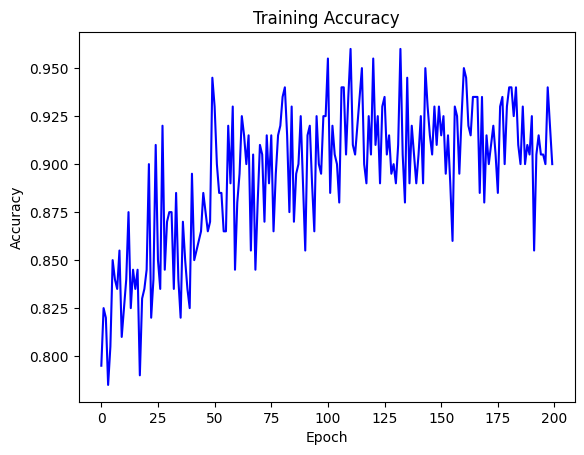

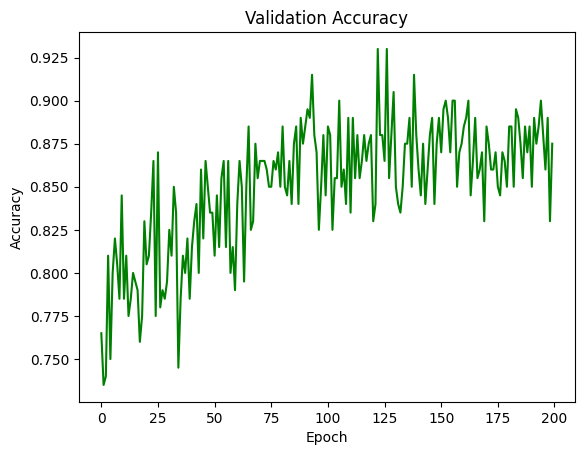

In [ ]:


# Load the training history
history = np.load('Model/brats2019.npy', allow_pickle=True).item()

# Plot the training accuracy
plt.plot(history['categorical_accuracy'], 'b')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot the validation accuracy
plt.plot(history['val_categorical_accuracy'], 'g')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()